<a href="https://colab.research.google.com/github/D-314/cyber-tuber/blob/main/processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!git clone https://github.com/D-314/cyber-tuber.git
!mv cyber-tuber/* .
!rm -rf cyber-tuber

Cloning into 'cyber-tuber'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 46 (delta 22), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (46/46), 227.45 KiB | 2.84 MiB/s, done.


In [3]:
dataset = pd.read_csv("baza_dannykh_dlya_stati.csv").set_index('№')

In [4]:
# Функция для поиска последней ячейки с единицей в строке (написанная силами ChatGPT :))
def find_last_one(df_row):
    """
    Функция находит последнюю ячейку со значением 1 в переданной строке DataFrame и возвращает имя колонки для этой ячейки.
    Если вся строка состоит из NaN, возвращает пустую строку.
    """
    last_one = None
    for col in df_row.index[::-1]:
        if df_row[col] == 1:
            last_one = col
            break
    return last_one if last_one is not None else np.NaN

def is_efficient(string):
    if string.startswith('эффективный'):
        return 'эффективный'
    else:
        return 'неэффективный'

In [5]:
in_city = dataset['Житель Омска'].astype(str).apply(lambda x: 'Область' if (x[0] == '0') else 'Город' if (x[0] == '1') else np.NAN)

region = dataset['Житель Омска'].astype(str)+dataset['Житель ОО'].astype(str)
region = region.str.extract(r'\((.*?)\)')

graduation = dataset[['Образование среднее не полное','Среднее полное','Средне-специальное','Высшее']].apply(find_last_one, axis=1)
graduation = graduation.replace({'Образование среднее не полное': 'Ср.неполное',
                                 'Средне-специальное': 'Ср.специальное',
                                 'Среднее полное': 'Ср.полное',})

work = dataset[['Работает\Учащийся','Безработный','Пенсионер']].apply(find_last_one, axis=1)

efficiency = dataset['Исход'].apply(is_efficient)

df = pd.concat([in_city, region,work,graduation, efficiency], axis=1)
del in_city, region,graduation,work,efficiency
df.columns = ['Локация', 'Регион', 'Работа' , 'Образование', 'Исход']
df

,Локация,Регион,Работа,Образование,Исход
№,,,,,
ОСК111,Область,Крутинский,Работает\Учащийся,Ср.специальное,неэффективный
ОСК112,Область,Крутинский,Безработный,Ср.полное,неэффективный
ОСК113,Область,Усть-Ишимский,Безработный,Ср.специальное,неэффективный
ОСК114,Город,ЛАО,Работает\Учащийся,Ср.специальное,эффективный
ОСК115,Область,Муромцевский,Работает\Учащийся,Ср.полное,эффективный
...,...,...,...,...,...
ОСК183,Город,КАО,Безработный,Ср.специальное,неэффективный
ОСК184,Город,ЛАО,NaN,Ср.неполное,эффективный
ОСК185,Область,Исилькульский,Пенсионер,Ср.специальное,неэффективный


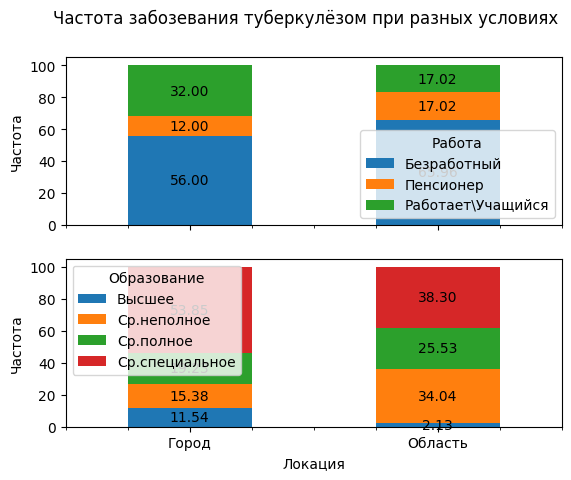

In [6]:
# Строим два графика в разных областях графика
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
#df.groupby('Локация')['Работа'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, ax=ax1)
#df.groupby('Локация')['Образование'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, ax=ax2)

# Группируем данные по столбцу 'Локация'
grouped = df.groupby('Локация')

# Получаем частоту появления значений в столбце 'Работа'
work_freq = grouped['Работа'].value_counts(normalize=True).unstack()*100

# Получаем частоту появления значений в столбце 'Образование'
edu_freq = grouped['Образование'].value_counts(normalize=True).unstack()*100

# Строим первый график
work_freq.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Частота')
#ax1.set_title('Работа')

# Добавляем надписи с частотой появления значений на первый график
for i in ax1.containers:
    ax1.bar_label(i, label_type='center', labels=[f'{x:.2f}' for x in i.datavalues])

# Строим второй график
edu_freq.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_ylabel('Частота')
#ax2.set_title('Образование')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# Добавляем надписи с частотой появления значений на второй график
for i in ax2.containers:
    ax2.bar_label(i, label_type='center', labels=[f'{x:.2f}' for x in i.datavalues])

# Добавляем заголовок для всего рисунка
plt.suptitle('Частота забозевания туберкулёзом при разных условиях')
plt.show()
del grouped,work_freq,edu_freq,i,fig,ax1,ax2

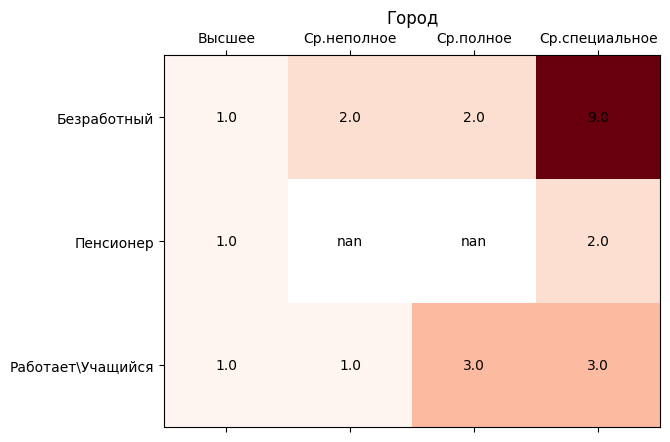

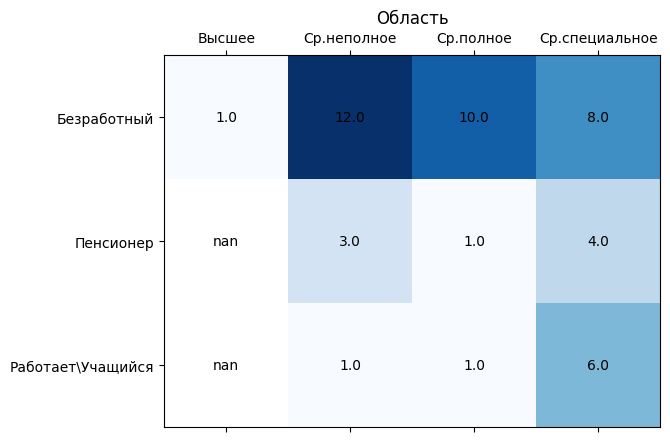

In [7]:
# Заменяем NaN на строку 'N/A'
#df = df.fillna('N/A')

# Считаем количество значений в каждой группе
counts = df.groupby(['Локация', 'Работа', 'Образование']).size().reset_index(name='count')

# Создаем три отдельных массива значений для каждой локации
loc_a = counts[counts['Локация'] == 'Город'].pivot(index='Работа', columns='Образование', values='count')
loc_b = counts[counts['Локация'] == 'Область'].pivot(index='Работа', columns='Образование', values='count')

# Создаем график для локации A
plt.matshow(loc_a, cmap='Reds')
plt.xticks(np.arange(len(loc_a.columns)), loc_a.columns)
plt.yticks(np.arange(len(loc_a.index)), loc_a.index)
plt.title('Город')
for i in range(len(loc_a.index)):
    for j in range(len(loc_a.columns)):
        plt.text(j, i, loc_a.iloc[i, j], ha='center', va='center', color='black')

# Создаем график для локации B
plt.matshow(loc_b, cmap='Blues')
plt.xticks(np.arange(len(loc_b.columns)), loc_b.columns)
plt.yticks(np.arange(len(loc_b.index)), loc_b.index)
plt.title('Область')
for i in range(len(loc_b.index)):
    for j in range(len(loc_b.columns)):
        plt.text(j, i, loc_b.iloc[i, j], ha='center', va='center', color='black')

plt.show()

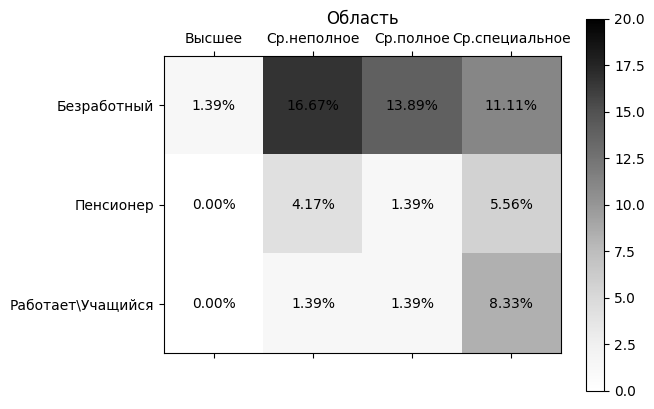

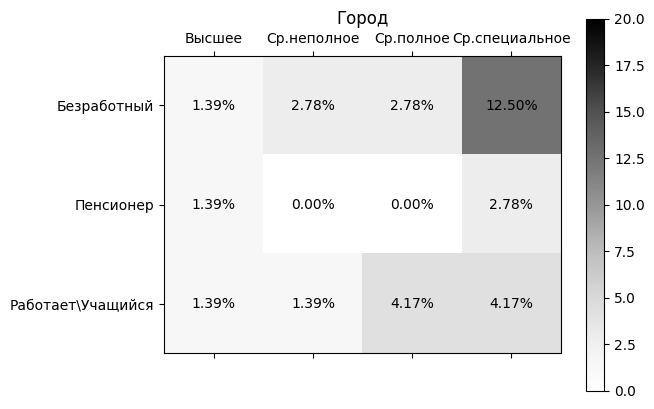

In [22]:
freqs = df.groupby(['Локация', 'Работа', 'Образование']).size()

# Получение нормализованных частот
norm_freqs = 100 * freqs / freqs.sum()

# Построение двухмерных графиков
for loc in df['Локация'].dropna().unique():
    subset = norm_freqs[loc]
    subset = subset.unstack().fillna(0)
    plt.matshow(subset, cmap='Greys', vmin=0, vmax=20)
    plt.title(loc)
    ax = plt.gca()
    # Добавляем надписи
    for (i, j), z in np.ndenumerate(subset):
        ax.text(j, i, '{:0.2f}%'.format(z), ha='center', va='center')
    plt.xticks(range(len(subset.columns)), subset.columns)
    plt.yticks(range(len(subset.index)), subset.index)
    plt.colorbar()
    plt.show()